In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import mne
import pathlib
import sklearn
import seaborn as sns
from meegkit import dss
from pyprep import NoisyChannels, PrepPipeline
 
from pycrostates.preprocessing import extract_gfp_peaks
from neurokit2.microstates.microstates_clean import microstates_clean
from mne_icalabel import label_components
from scipy.stats import kurtosis, skew

In [3]:
from eeg_clean import epoch_stats, channel_stats, clean

In [4]:
def zapline_clean(raw, fline):
    data = raw.get_data().T # Convert mne data to numpy darray
    sfreq = raw.info['sfreq'] # Extract the sampling freq
   
    #Apply MEEGkit toolbox function
    out, _ = dss.dss_line(data, fline, sfreq, nkeep=1) # fline (Line noise freq) = 50 Hz for Europe
    print(out.shape)

    cleaned_raw = mne.io.RawArray(out.T, raw.info) # Convert output to mne RawArray again

    return cleaned_raw

In [3]:
data_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Data\srm_data")
file = data_folder / "sub-006_ses-t1_task-resteyesc_eeg.edf"


raw = mne.io.read_raw_edf(file, preload=True, verbose=False)
raw.crop(60, 120)
raw.set_montage('biosemi64')
#raw.drop_channels(['T8', 'T7', 'F5', 'TP7', 'P9'])

#filt_raw = raw.copy().filter(l_freq=1.0, h_freq=100.0)
#line_noise = zapline_clean(raw_lowpass, 50)
#raw_down_sampled = filt_raw.copy().resample(sfreq=201, verbose=False)

Measurement date,"August 24, 2021 11:00:52 GMT"
Experimenter,Unknown
Participant,<no
Digitized points,67 points
Good channels,64 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,1024.00 Hz
Highpass,0.00 Hz
Lowpass,512.00 Hz


test pyprep

In [4]:
montage_kind = "biosemi64"
montage = mne.channels.make_standard_montage(montage_kind)
# Extract some info
sample_rate = raw.info["sfreq"]
# Make a copy of the data
raw_copy = raw.copy()

In [9]:
# Fit prep
prep_params = {
    "ref_chs": "eeg",
    "reref_chs": "eeg",
    "line_freqs": np.arange(50, sample_rate / 2, 50),
}

prep = PrepPipeline(raw_copy, prep_params, montage, matlab_strict=True, random_state=435656)
prep.fit()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3381 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Removed notch frequencies (Hz):
     50.00 :  704 windows
    100.00 :  704 windows
    150.00 :  704 windows
    200.00 :  704 windows
    249.00 :  704 windows
    250.00 :  704 windows
    251.00 :  704 windows
    299.00 :  704 windows
    300.00 :  704 windows
    301.00 :  704 windows
    349.00 :  704 windows
    350.00 :  704 windows
    351.00 :  704 windows
    399.00 :  704 windows
    400.00 :  704 windows
    401.00 :  704 windows
    449.00 :  704 windows
    450.00 :  704 windows
    451.00 :  704 windows
    499.00 :  704 windows
    500.00 :  704 windows
    501.00 :  704 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


100%|██████████|  : 12/12 [00:05<00:00,    2.33it/s]


RANSAC done!



2024-04-02 11:09:48,499 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': ['O1', 'PO4'], 'bad_by_hf_noise': ['O1', 'Iz', 'Oz', 'O2'], 'bad_by_correlation': ['Iz', 'Cz', 'CP2', 'P4', 'PO4'], 'bad_by_SNR': ['Iz'], 'bad_by_dropout': [], 'bad_by_ransac': ['P3', 'CPz'], 'bad_all': ['Iz', 'Oz', 'CP2', 'CPz', 'Cz', 'O2', 'O1', 'P3', 'P4', 'PO4']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


100%|██████████|  : 12/12 [00:05<00:00,    2.33it/s]


RANSAC done!



2024-04-02 11:09:56,092 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': ['PO4'], 'bad_by_hf_noise': ['Iz', 'Oz', 'O1', 'O2'], 'bad_by_correlation': ['Iz', 'CP2', 'CPz', 'Cz', 'P4', 'PO4'], 'bad_by_SNR': ['Iz'], 'bad_by_dropout': [], 'bad_by_ransac': ['P3'], 'bad_all': ['Iz', 'Oz', 'CP2', 'CPz', 'Cz', 'O2', 'O1', 'P3', 'P4', 'PO4']}
2024-04-02 11:09:56,246 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


100%|██████████|  : 12/12 [00:05<00:00,    2.31it/s]


RANSAC done!



2024-04-02 11:10:03,394 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': ['PO4'], 'bad_by_hf_noise': ['Iz', 'Oz', 'O2', 'O1', 'PO8'], 'bad_by_correlation': ['Iz', 'CP2', 'CPz', 'Cz', 'FT8', 'P4', 'PO4'], 'bad_by_SNR': ['Iz'], 'bad_by_dropout': [], 'bad_by_ransac': ['CPz', 'P3', 'P2'], 'bad_all': ['Iz', 'Oz', 'CP2', 'CPz', 'Cz', 'O2', 'O1', 'PO8', 'FT8', 'P3', 'P2', 'P4', 'PO4']}
2024-04-02 11:10:03,547 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


100%|██████████|  : 12/12 [00:05<00:00,    2.34it/s]


RANSAC done!



2024-04-02 11:10:10,602 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': ['PO4'], 'bad_by_hf_noise': ['Iz', 'Oz', 'O2', 'O1', 'PO8'], 'bad_by_correlation': ['Iz', 'CP2', 'CPz', 'Cz', 'FT8', 'P4', 'PO4'], 'bad_by_SNR': ['Iz'], 'bad_by_dropout': [], 'bad_by_ransac': ['CPz', 'P3', 'P2'], 'bad_all': ['Iz', 'Oz', 'CP2', 'CPz', 'Cz', 'O2', 'O1', 'PO8', 'FT8', 'P3', 'P2', 'P4', 'PO4']}
2024-04-02 11:10:10,603 - pyprep.reference - INFO - Robust reference done


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


100%|██████████|  : 12/12 [00:05<00:00,    2.34it/s]


RANSAC done!
Found 13 uniquely bad channels:

0 by NaN: []

0 by flat: []

1 by deviation: ['PO4']

5 by HF noise: ['O1', 'Iz', 'Oz', 'PO8', 'O2']

6 by correlation: ['Iz', 'FT8', 'Cz', 'CP2', 'P4', 'PO4']

1 by SNR: ['Iz']

0 by dropout: []

3 by RANSAC: ['P3', 'CPz', 'P2']

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


Executing RANSAC
This may take a while, so be patient...


100%|██████████|  : 12/12 [00:05<00:00,    2.19it/s]


RANSAC done!


In [10]:
print("Bad channels: {}".format(prep.interpolated_channels))
print("Bad channels original: {}".format(prep.noisy_channels_original["bad_all"]))
print("Bad channels after interpolation: {}".format(prep.still_noisy_channels))

# pyprep results
# ----------------
#Bad channels: ['Iz', 'Oz', 'PO7', 'CP2', 'CPz', 'Cz', 'O2', 'O1', 'PO8', 'FT8', 'P3', 'P4', 'PO4']
#Bad channels original: ['Iz', 'PO7', 'Oz', 'CP2', 'CPz', 'Cz', 'O2', 'O1', 'PO8', 'P3', 'P2', 'P4', 'PO4']
#Bad channels after interpolation: ['CP3']

# matlab results
#Bad channels: ['Iz', 'Oz', 'CP2', 'CPz', 'Cz', 'O2', 'O1', 'PO8', 'FT8', 'P3', 'P2', 'P4', 'PO4']
#Bad channels original: ['Iz', 'Oz', 'CP2', 'CPz', 'Cz', 'O2', 'O1', 'P3', 'P4', 'PO4']
#Bad channels after interpolation: ['CP3']

Bad channels: ['Iz', 'Oz', 'CP2', 'CPz', 'Cz', 'O2', 'O1', 'PO8', 'FT8', 'P3', 'P2', 'P4', 'PO4']
Bad channels original: ['Iz', 'Oz', 'CP2', 'CPz', 'Cz', 'O2', 'O1', 'P3', 'P4', 'PO4']
Bad channels after interpolation: ['CP3']


Bad epoch idenfication - based on topographic stability

Between GFP peaks

In [17]:
ones_epochs = mne.make_fixed_length_epochs(raw_down_sampled, 0.5, verbose=False, preload=True)

In [161]:
stats = epoch_stats.EpochStats(ones_epochs, switching_frq_thresholds=np.array([1, 1.4]))
stats.calc_stability()

In [162]:
epoched_stability = stats.quasi_stability.get_mean_abs_stab()
convex_stabilty = stats.quasi_stability.get_mean_stab()
epoched_switching_freq = stats.quasi_stability.switching_freqs[:, 0]
significant_switching_freq = stats.quasi_stability.switching_freqs[:, 1]
peaks = stats.n_gfp_peaks

Plots to investigate exclusion of epocs not following our assumptions.

Epoch averaged DISS

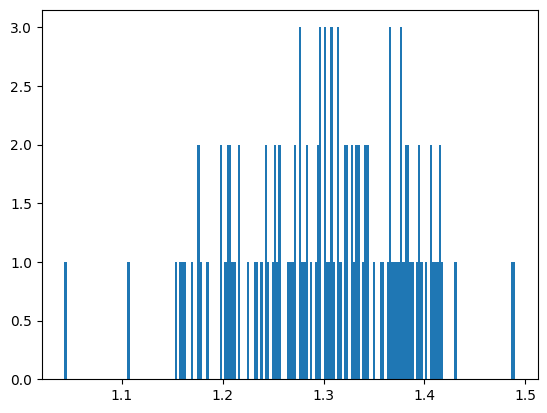

In [163]:
plt.hist(convex_stabilty, bins=200)
plt.show()

Stability transformed: absoluteDISS = |DISS-1| ... and averaged for each epoch. Now only high values indicate stability.

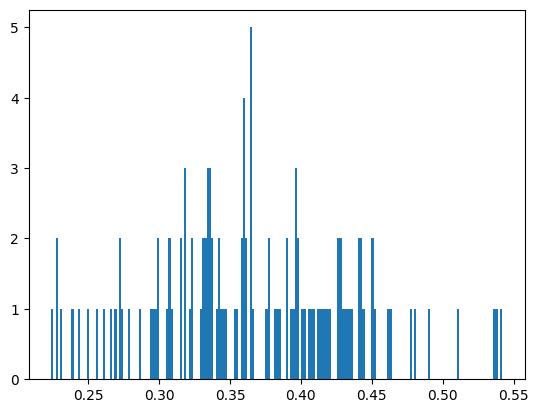

In [164]:
plt.hist(epoched_stability, bins=200)
plt.show()

Average epoch polarity inversion going from gfp peak to gfp peak, meaning DISS < 1.

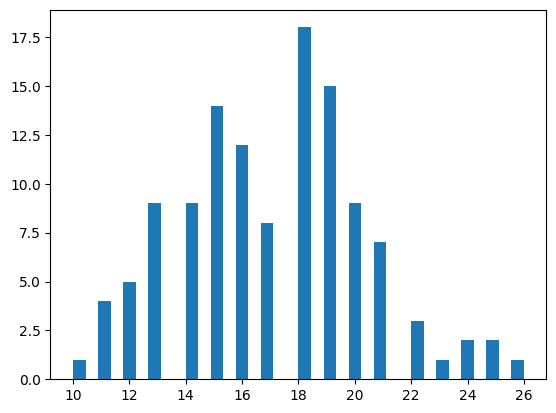

In [165]:
plt.hist(epoched_switching_freq, bins=36)
plt.show()

The same again, but only for shifts in polarity where higher stability is indicated (DISS > 1.4)

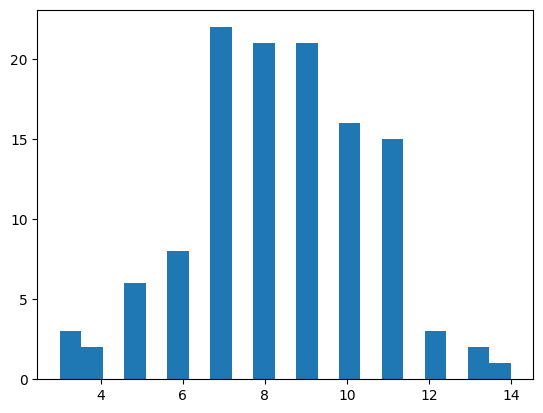

In [166]:
plt.hist(significant_switching_freq, bins=21)
plt.show()

Number of GFP peaks for each epoch

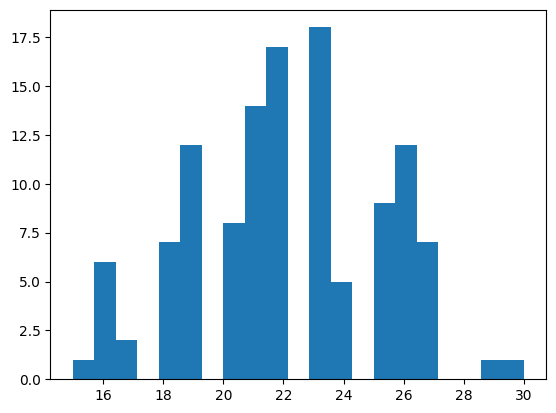

In [167]:
plt.hist(peaks, bins=21)
plt.show()

Looking at scatter plot between swithcing frequencies and number of GFP peaks

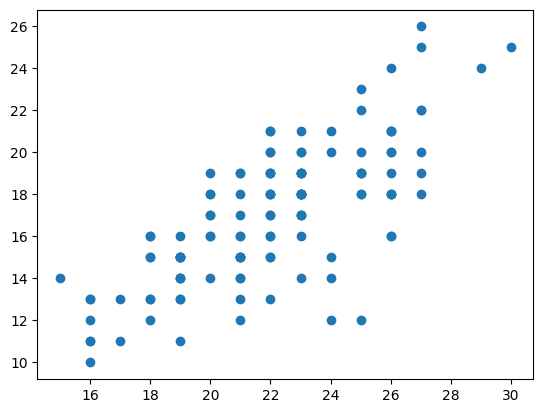

In [168]:
plt.scatter(peaks, epoched_switching_freq)
plt.show()

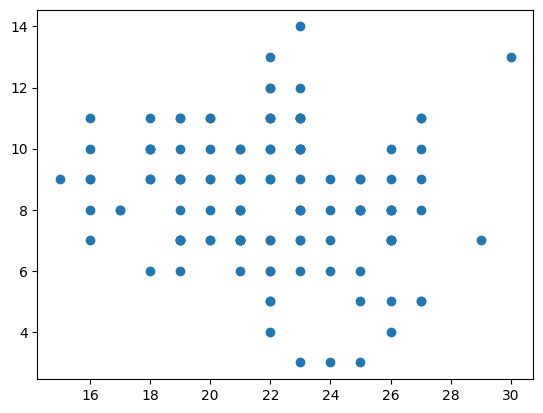

In [169]:
plt.scatter(peaks, significant_switching_freq)
plt.show()

Looking at average absoluteDISS in relation to switching frequencies.

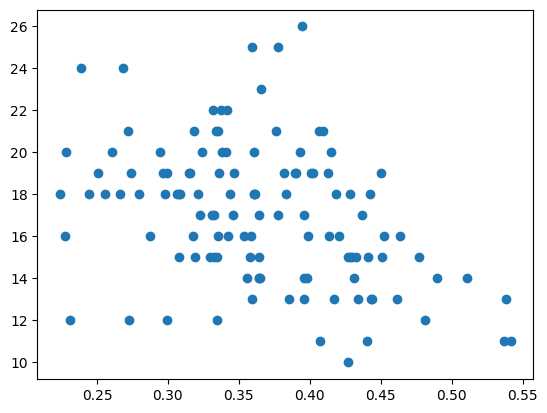

In [170]:
plt.scatter(epoched_stability, epoched_switching_freq)
plt.show()

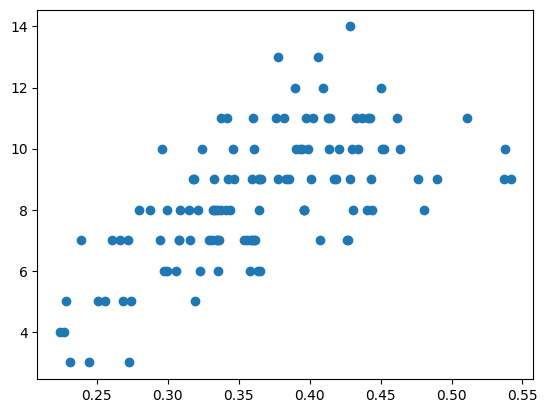

In [171]:
plt.scatter(epoched_stability, significant_switching_freq)
plt.show()

Same but with average DISS

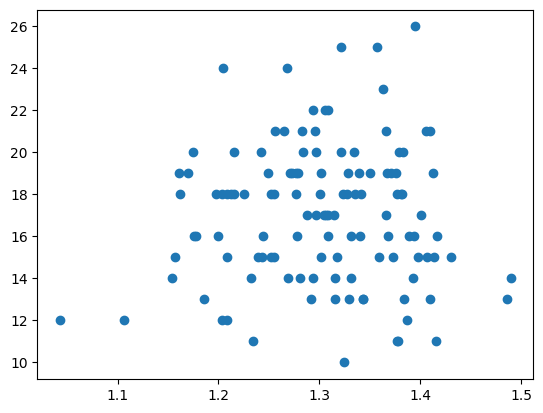

In [172]:
plt.scatter(convex_stabilty, epoched_switching_freq)
plt.show()

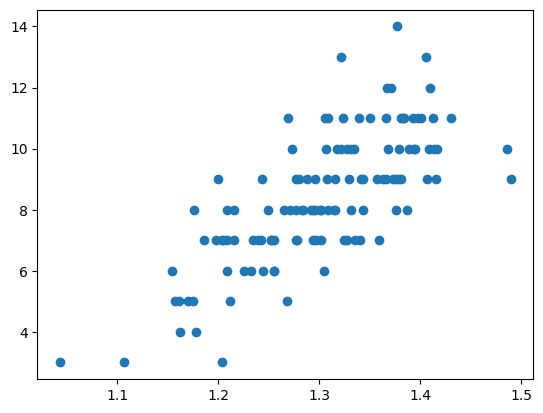

In [173]:
plt.scatter(convex_stabilty, significant_switching_freq)
plt.show()

Scatter of the two stability types

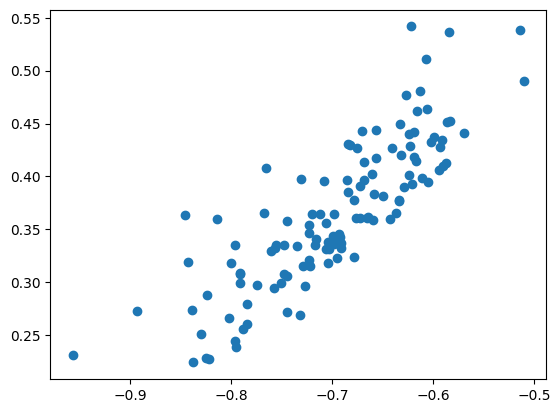

In [174]:
plt.scatter(convex_stabilty-2, epoched_stability)
plt.show()

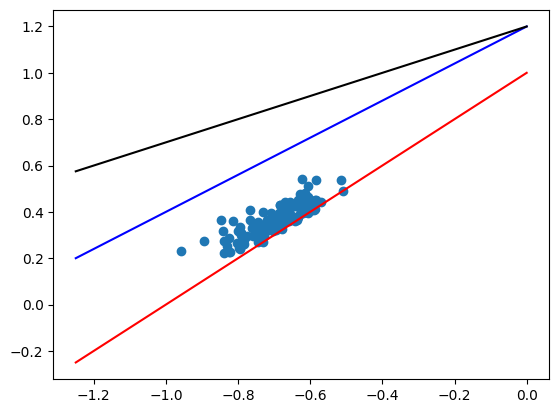

In [175]:
fit = np.poly1d([1, 1])
polyline = np.linspace(-1.25, 0, 100)
reg = np.poly1d([0.8, 1.2])
reg2 = np.poly1d([0.5, 1.2])
plt.scatter(convex_stabilty-2, epoched_stability)
plt.plot(polyline, fit(polyline), color='red')
plt.plot(polyline, reg(polyline), color="blue")
plt.plot(polyline, reg2(polyline), color="black")
plt.show()


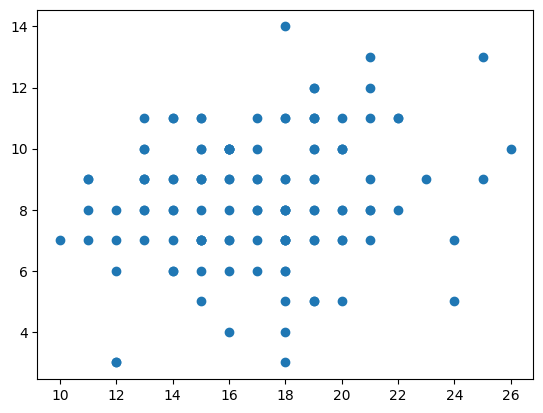

In [176]:
plt.scatter(epoched_switching_freq, significant_switching_freq)
plt.show()

At GFP peaks

In [177]:
at_epoched_stability = stats.peak_stability.get_mean_abs_stab()
at_convex_stabilty = stats.peak_stability.get_mean_stab()

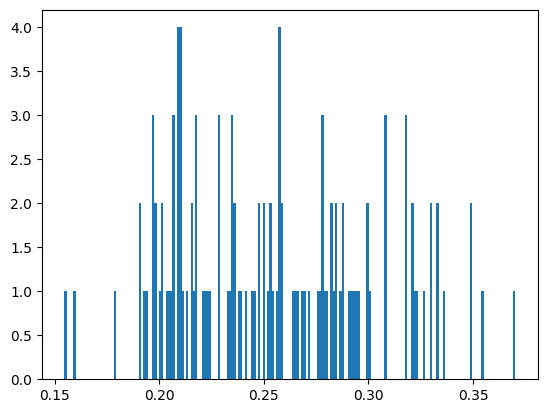

In [178]:
plt.hist(at_epoched_stability, bins=200)
plt.show()

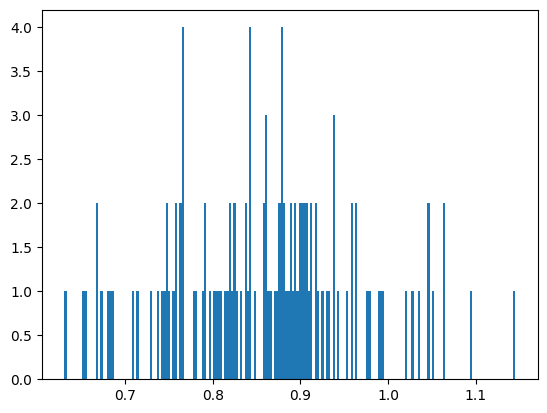

In [179]:
plt.hist(at_convex_stabilty, bins=200)
plt.show()

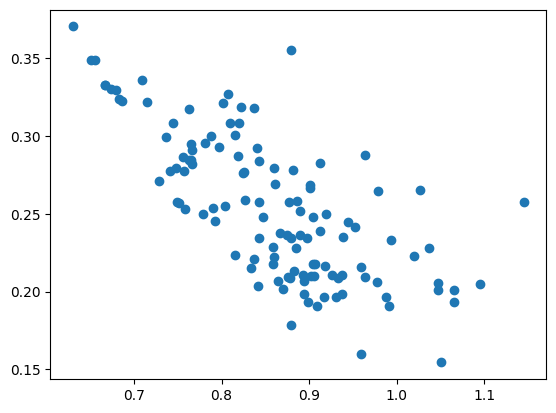

In [180]:
plt.scatter(at_convex_stabilty, at_epoched_stability)
plt.show()

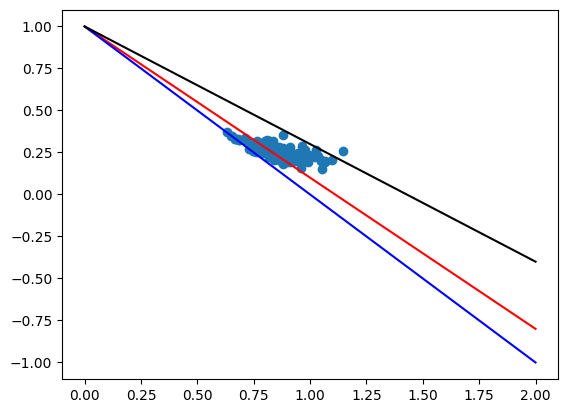

In [181]:
fit = np.poly1d([-0.9, 1])
reg = np.poly1d([-1, 1])
reg2 = np.poly1d([-0.7, 1])
polyline = np.linspace(0, 2, 100)
plt.scatter(at_convex_stabilty, at_epoched_stability)
plt.plot(polyline, fit(polyline), color='red')
plt.plot(polyline, reg(polyline), color="blue")
plt.plot(polyline, reg2(polyline), color="black")
plt.show()

In [182]:
print(fit)

 
-0.9 x + 1


In [183]:
def scale(values):
    v = values.reshape(-1, 1)
    scaler = sklearn.preprocessing.StandardScaler()
    noe = scaler.fit_transform(v)
    return noe

Bad channel evaluation

In [184]:
stats_channels = channel_stats.ChannelStats(ones_epochs, sklearn_scaler=sklearn.preprocessing.MinMaxScaler())

Channel Satbility

At GFP peaks

In [185]:
at_test1 = stats_channels.peak_stab_change
test1 = stats_channels.quasi_stab_change

In [186]:
#at_test1 = np.delete(at_test1, 51)
#at_test1 = np.delete(at_test1, 14)
#at_test1 = np.delete(at_test1, 5)
#at_test1 = np.delete(at_test1, 13)

In [187]:
print(at_test1.shape)

(64,)


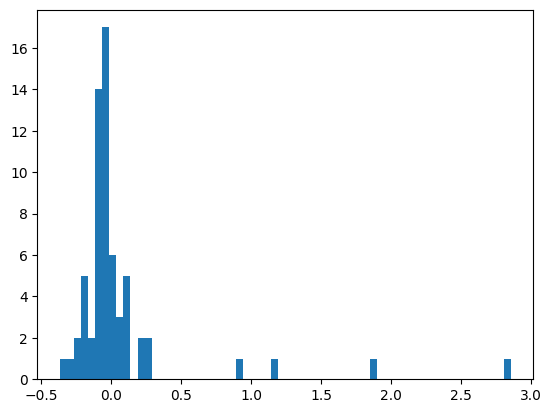

In [188]:
plt.hist(at_test1*64, bins=64)
plt.show()

In [223]:
order = np.argsort(at_test1)
n = 58
print(skew(at_test1[order][:n]))
print(kurtosis(at_test1[order][:n]))
print(np.array(stats_channels.ch_name_list)[order])

-0.21598932337260915
0.7570558871316253
['POz' 'Pz' 'P1' 'PO3' 'Oz' 'PO4' 'O1' 'P3' 'O2' 'CPz' 'P2' 'Iz' 'CP1'
 'C1' 'PO8' 'P4' 'C3' 'F4' 'Fp2' 'FCz' 'AF8' 'P9' 'FC1' 'AF4' 'P10' 'C4'
 'AFz' 'PO7' 'TP8' 'C2' 'CP3' 'FC4' 'P6' 'Fpz' 'CP4' 'Fz' 'F1' 'CP6' 'P5'
 'CP2' 'Cz' 'CP5' 'FC3' 'FT8' 'FC2' 'FC6' 'P7' 'C6' 'P8' 'F7' 'FC5' 'FT7'
 'Fp1' 'C5' 'F2' 'AF7' 'F6' 'F3' 'F8' 'AF3' 'TP7' 'F5' 'T7' 'T8']


In [190]:
print(order[-1])

51


Between GFP peaks

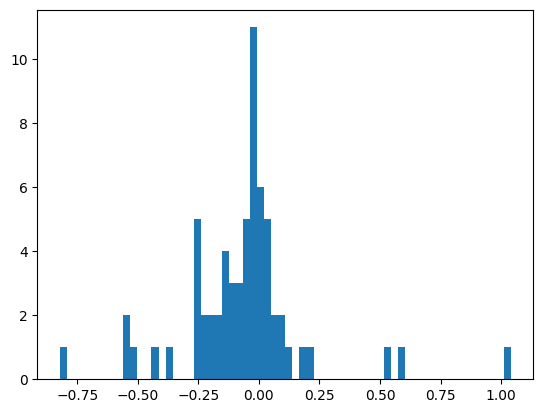

In [191]:
plt.hist(test1*64, bins=64)
plt.show()

In [220]:
order = np.argsort(test1)
n = 63
print(skew(test1[order][:n]))
print(kurtosis(test1[order][:n]))
print(np.array(stats_channels.ch_name_list)[order])

-0.3418419248366307
3.0194181033162577
['POz' 'P2' 'P1' 'Pz' 'Oz' 'PO3' 'P4' 'CPz' 'AF3' 'PO7' 'CP2' 'P3' 'CP1'
 'C2' 'O1' 'C3' 'C5' 'PO4' 'P6' 'TP8' 'CP3' 'F4' 'Iz' 'P5' 'C1' 'CP5'
 'AF8' 'F1' 'CP4' 'P10' 'CP6' 'Fz' 'FC1' 'Fp2' 'FC6' 'Cz' 'O2' 'F6' 'C4'
 'F3' 'FC3' 'AF4' 'FC2' 'FCz' 'Fpz' 'AF7' 'Fp1' 'FC5' 'FC4' 'F8' 'FT7'
 'PO8' 'F7' 'AFz' 'P7' 'FT8' 'C6' 'P8' 'F2' 'F5' 'TP7' 'T8' 'T7' 'P9']


test threshold exclusions..

In [194]:
clean_test = clean.Clean(ones_epochs)

In [195]:
bad_epochs = clean_test.find_bad_epochs(peaks_args={"method": "threshold", "threshold": 0.8, "exclude": "bigger"})

In [196]:
print(bad_epochs)

(array([  1,   2,   4,   5,   6,   7,   8,  16,  17,  19,  20,  24,  25,
        26,  29,  32,  33,  34,  35,  38,  39,  40,  41,  42,  43,  44,
        45,  46,  47,  52,  53,  54,  56,  57,  58,  59,  60,  61,  62,
        64,  65,  66,  67,  68,  70,  71,  72,  73,  77,  78,  79,  81,
        82,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118], dtype=int64),)


In [197]:
bad_epochs = clean_test.find_bad_epochs(peaks_args={"method": "function_threshold", "function": np.poly1d([-1, 1.2]), "exclude":"bigger"})

In [198]:
print(bad_epochs)

(array([ 29,  45,  82,  91,  97,  99, 101, 106, 108, 113, 114, 115, 116,
       118], dtype=int64),)


PCA heuristic idea

In [199]:
pc_all_chanels = stats_channels.pca_auc_change

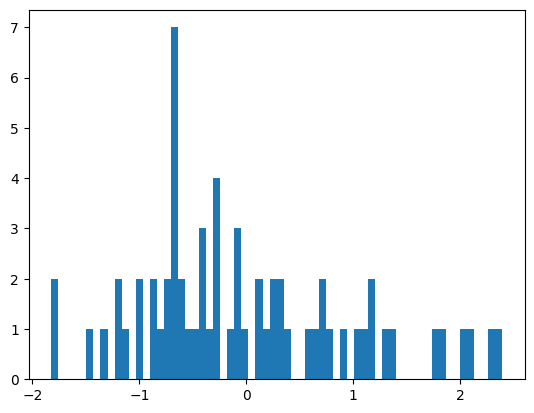

In [221]:
plt.hist(scale(pc_all_chanels), bins=64)
plt.show()

In [201]:
order = np.argsort(pc_all_chanels)
print(stats_channels.ch_name_list[order])

['P1' 'POz' 'P2' 'Pz' 'Oz' 'CP1' 'CPz' 'O1' 'Fz' 'C1' 'Fp2' 'F1' 'AF4'
 'P3' 'C2' 'P4' 'Fpz' 'Cz' 'AFz' 'PO3' 'FCz' 'CP2' 'FC1' 'PO8' 'F4' 'CP4'
 'CP3' 'PO7' 'AF8' 'C3' 'P5' 'O2' 'P6' 'C6' 'FC3' 'CP6' 'Iz' 'FC5' 'FC4'
 'C5' 'PO4' 'Fp1' 'C4' 'P10' 'FC6' 'FT7' 'FT8' 'FC2' 'P7' 'AF7' 'P8' 'F6'
 'F8' 'CP5' 'TP8' 'F3' 'F7' 'AF3' 'P9' 'T7' 'F2' 'TP7' 'F5' 'T8']


In [202]:
bad_by_corr = np.where(pc_all_chanels > 0)[0]
print(stats_channels.ch_name_list[bad_by_corr])

['AF3' 'F3' 'F5' 'F7' 'T7' 'TP7' 'CP5' 'P9' 'F2' 'F6' 'F8' 'T8' 'TP8']


In [203]:
idx = np.where((at_test1 > 0) & (test1 > 0) & (pc_all_chanels > 0))[0]
print(idx)

[ 5  6 14 15 38 41 51]


In [204]:
print(stats_channels.ch_name_list[idx])

['F5' 'F7' 'T7' 'TP7' 'F2' 'F8' 'T8']


In [205]:
idx = np.where((at_test1 > 0) & (pc_all_chanels > 0))[0]
idx2 = np.where((test1 > 0) & (pc_all_chanels > 0))[0]
print(idx)
print(idx2)

[ 2  4  5  6 14 15 38 40 41 51]
[ 5  6 14 15 23 38 41 51]


In [206]:
print(stats_channels.ch_name_list[idx])
print(stats_channels.ch_name_list[idx2])

['AF3' 'F3' 'F5' 'F7' 'T7' 'TP7' 'F2' 'F6' 'F8' 'T8']
['F5' 'F7' 'T7' 'TP7' 'P9' 'F2' 'F8' 'T8']


Channels to exclude

In [207]:
acum = []
for cn in stats_channels.ch_name_list[np.argsort(test1)]:
    if cn in stats_channels.ch_name_list[bad_by_corr]:
        print(cn)
        acum.append(cn)
    else:
        break
for cn in stats_channels.ch_name_list[np.argsort(at_test1)]:
    if cn in stats_channels.ch_name_list[bad_by_corr]:
        if cn not in acum:
            print(cn)
    else:
        break


Evaluate

In [8]:
from data_quality import ica_score

In [18]:
ones_epochs.set_eeg_reference()
evaluate = ica_score.IcaScore(ones_epochs)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 16 components
Computing Extended Infomax ICA
Fitting ICA took 8.4s.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
